## Задания для самостоятельного выполнения



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

1. Для придания смысла кластерам выведите примеры точек выборки для каждого кластера. Сделайте вывод, чем они отличаются.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML6.1%20clustering/data/mall_customers_clustering.csv', index_col=0)
df.head()
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)
X.head()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [ ]:
k_means = KMeans(n_clusters=3, random_state=42).fit(X)

In [ ]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [ ]:
clusters = k_means.fit_predict(X_flat)

cluster_df = pd.DataFrame(clusters, columns=['Cluster'])

In [ ]:
cluster_df.head()

,Cluster
0,2
1,2
2,2
3,2
4,2


In [ ]:
for cluster in cluster_df['Cluster'].unique():
    print(f'Cluster {cluster} examples:')
    print(cluster_df[cluster_df['Cluster'] == cluster].head(3))

Cluster 2 examples:
   Cluster
0        2
1        2
2        2
Cluster 1 examples:
     Cluster
123        1
125        1
127        1
Cluster 0 examples:
     Cluster
124        0
126        0
128        0


2. Используйте для визуализации результатов кластеризации другие пары признаков. Сделайте вывод о зависимости кластеризации от признаков.

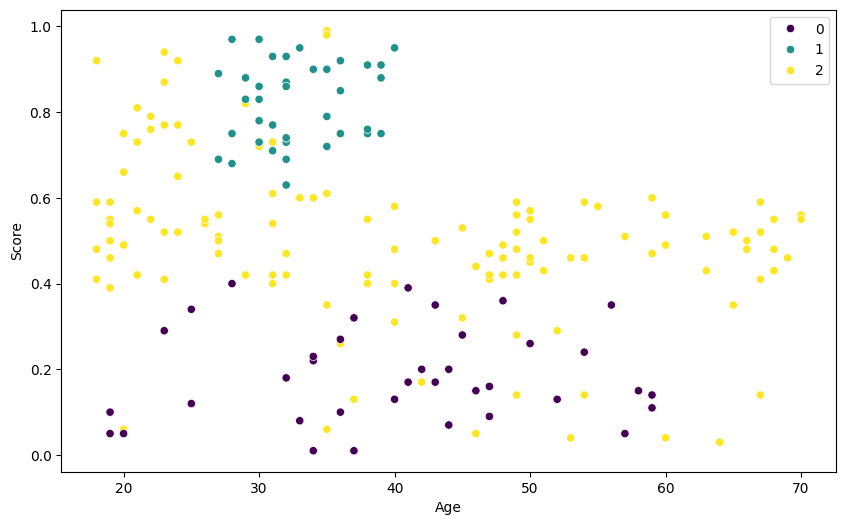

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Score'], hue=cluster_df['Cluster'], palette='viridis')
plt.legend()
plt.show()

3. Повторите весь анализ для другого датасета - кластеризации кредитных карт.

In [ ]:
credit_card_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML6.1%20clustering/data/credit_card_clustering.csv')

In [ ]:
credit_card_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
credit_card_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
credit_card_df.drop(['CUST_ID', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT'], axis=1, inplace=True)

In [ ]:
credit_card_df = pd.get_dummies(credit_card_df, drop_first=True)

In [ ]:
scaler = StandardScaler().fit(credit_card_df)
credit_card_scaled = scaler.transform(credit_card_df)
credit_card_scaled = pd.DataFrame(credit_card_scaled, columns=credit_card_df.columns)

In [ ]:
credit_card_flat = credit_card_scaled[['BALANCE', 'PURCHASES_FREQUENCY']]

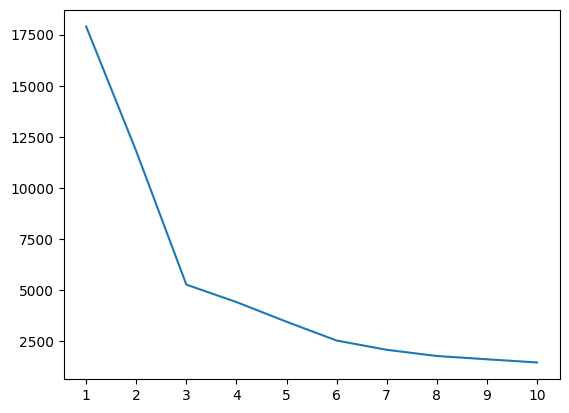

In [ ]:
flat = []
for i in range(1,11):
	flat.append(KMeans(n_clusters=i,random_state=42).fit(credit_card_flat).inertia_)
plt.plot(range(1,11),flat)
plt.xticks(range(1,11))
_ = plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(credit_card_flat)
y_kmeans = kmeans.labels_

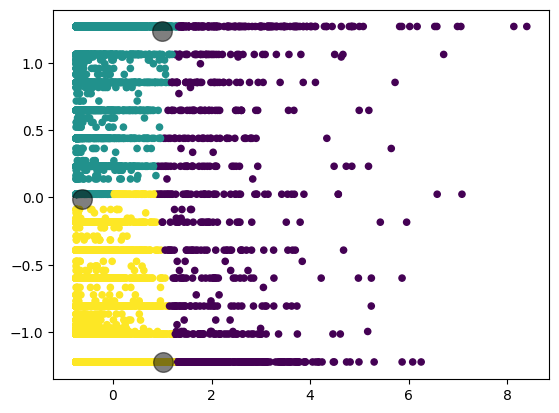

In [ ]:
plt.scatter(credit_card_flat.BALANCE, credit_card_flat.PURCHASES_FREQUENCY, c=y_kmeans, cmap='viridis', s=20)
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(credit_card_flat)
credit_card_df['Agg_Cluster'] = agg_clustering.labels_

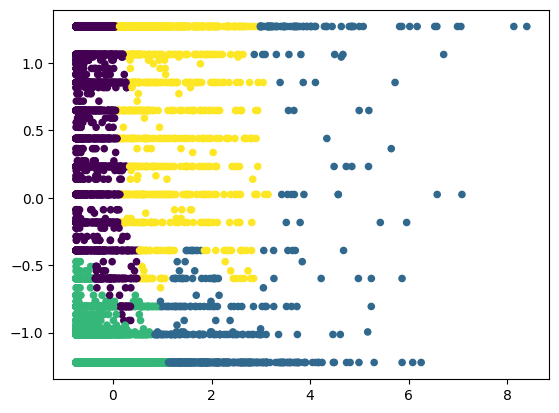

In [ ]:
plt.scatter(credit_card_flat.BALANCE, credit_card_flat.PURCHASES_FREQUENCY, c=agg_clustering.labels_, cmap='viridis', s=20)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(credit_card_scaled)

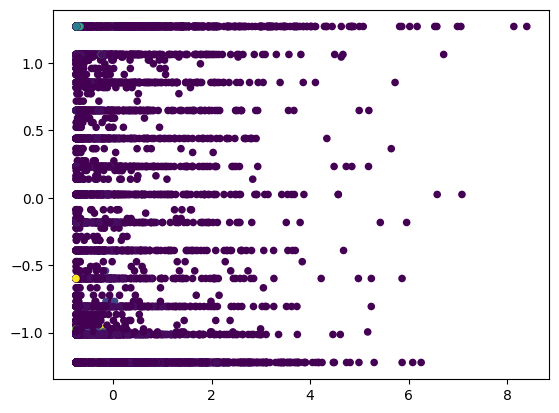

In [ ]:
plt.scatter(credit_card_flat.BALANCE, credit_card_flat.PURCHASES_FREQUENCY, c=dbscan.labels_, cmap='viridis', s=20)
plt.show()

4. В задании на иерархическую кластеризацию используйте разные методы расчета расстояния между кластерами. Сделайте выводы.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

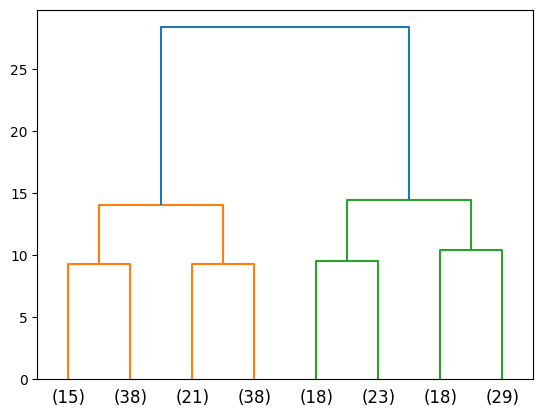

In [ ]:
plot_dendrogram(model, truncate_mode="level", p=2)

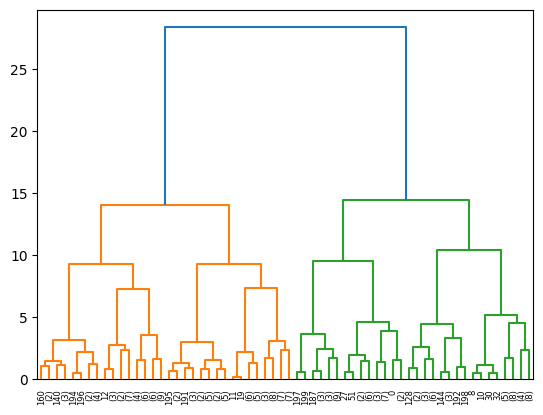

In [ ]:
plot_dendrogram(model, truncate_mode="level", p=5)

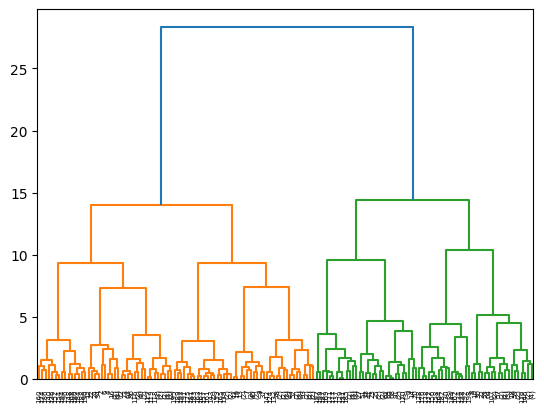

In [ ]:
plot_dendrogram(model, truncate_mode="level", p=7)

5. В задании на DBSCAN вычислите метрику WCSS и соотнесите результаты кластеризации через DBSCAN и К-средних.

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import pairwise_distances

In [ ]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

In [ ]:
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

In [ ]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

In [ ]:
def calculate_wcss(X, labels):
    unique_labels = np.unique(labels)
    wcss = 0
    for label in unique_labels:
        if label == -1:
            continue
        cluster_points = X[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        distances = pairwise_distances(cluster_points, [centroid])
        wcss += np.sum(distances ** 2)
    return wcss

In [ ]:
wcss = calculate_wcss(X_flat, y_db)
wcss

np.float64(128.73655636331478)

6. Постройте кривые WCSS в зависимости от параметров DBSCAN.

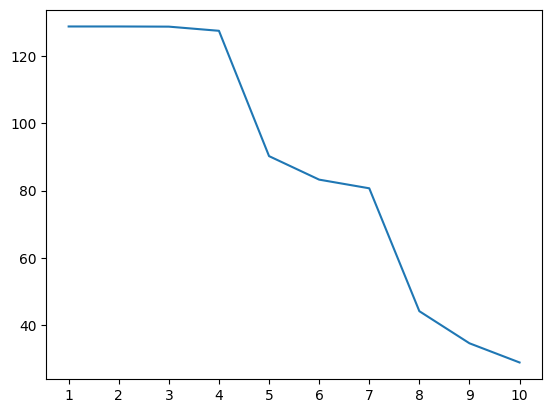

In [ ]:
wcss_metrics = []
for i in range(1,11):
    db = DBSCAN(eps=0.4, min_samples=i).fit(X_flat)
    y_db = db.labels_
    wcss = calculate_wcss(X_flat, y_db)
    wcss_metrics.append(wcss)
plt.plot(range(1,11),wcss_metrics)
plt.xticks(range(1,11))
_ = plt.show()